In [6]:
#Import Libraries

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter
#from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,5]

In [10]:
#Import file

df = pd.read_excel('Online Retail.xlsx')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Variables**

- **InvoiceNo**: BillNo number. A unique number for each transaction.
- **StockCode**: Stock Code for each product.
- **Description**: Product description.
- **Quantity**: It refers to how many of the products in the invoices have been sold.
- **InvoiceDate**: Invoice date.
- **UnitPrice**: Product price (pound).
- **CustomerID**: Unique customer number.
- **Country**: The name of the country where the customer lives.

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
# Retain only rows where Quantity and UnitPrice are greater than 0, ensuring logical values

df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

# Recompute and inspect the updated statistical summary

df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [17]:
#Check the % of missing values

def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[ percent_nan > 0 ].sort_values()
    
    return percent_nan

In [20]:
missing_values = percent_missing(df)
print(missing_values)

CustomerID    24.942275
dtype: float64


In [23]:
#Remove the missing observations from the dataset

df.dropna(inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


**Exploratory Data Analysis**

In [36]:
#How many unique values in each column?

for column in df.columns:
    print(column,df[column].nunique())

InvoiceNo 18532
StockCode 3665
Description 3877
Quantity 301
InvoiceDate 17282
UnitPrice 440
CustomerID 4338
Country 37


In [37]:
#How many unique items in the dataset?

df["Description"].nunique()

3877

In [40]:
#How many products in the dataset?

df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

In [41]:
#Converting CustomerID into string for better handling

df['CustomerID'] = df['CustomerID'].apply(int).apply(str)
df["CustomerID"]

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 397884, dtype: object

In [42]:
#Converting InvoiceDate into datetime

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [43]:
#Calculating Total Sales

df['TotalSales'] = df["Quantity"] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [47]:
#Lets count the number of transactions per customer

customer_counts = df.groupby('CustomerID').agg({'InvoiceNo': pd.Series.nunique}).sort_values(by='InvoiceNo',ascending=False).reset_index()
customer_counts.columns = ['CustomerID','count']
customer_counts

,CustomerID,count
0,12748,209
1,14911,201
2,17841,124
3,13089,97
4,14606,93
...,...,...
4333,15314,1
4334,15313,1
4335,15308,1
4336,15307,1


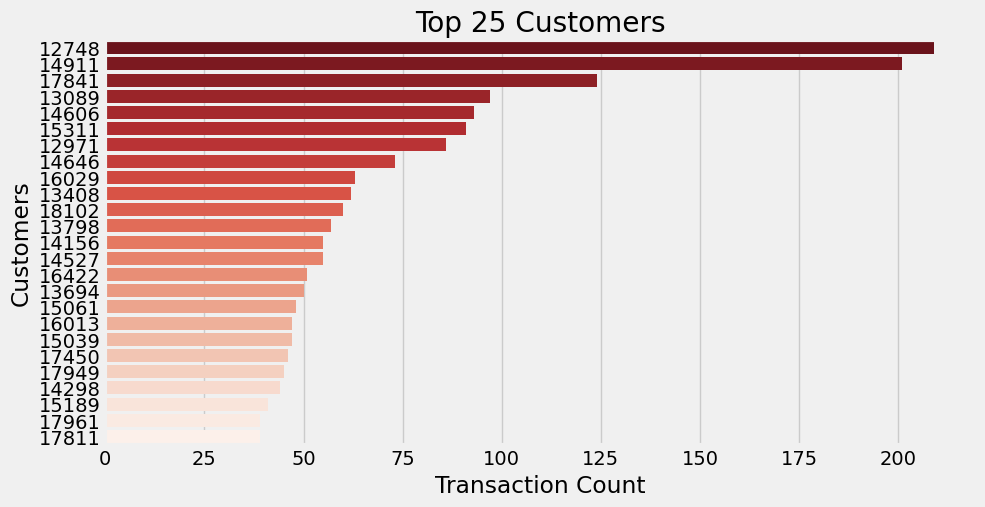

In [50]:
# Top 25 Customers
top25_customers = customer_counts.head(25)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=top25_customers,
    x="count",  # Use the column name as string
    y="CustomerID",  # Use the column name as string
    order=top25_customers['CustomerID'],  # Ensure it's a sorted list
    orient='h',
    palette="Reds_r"
)

# Add titles and labels
plt.title("Top 25 Customers")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

# Show the plot
plt.show()


In [51]:
#Examine Total Sales per Product

product_sales = df.groupby(['Description'])['TotalSales'].agg('sum').sort_values(ascending=False).reset_index()
product_sales

,Description,TotalSales
0,"PAPER CRAFT , LITTLE BIRDIE",168469.600
1,REGENCY CAKESTAND 3 TIER,142592.950
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.150
3,JUMBO BAG RED RETROSPOT,85220.780
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.730
...,...,...
3872,PURPLE FRANGIPANI HAIRCLIP,0.850
3873,VINTAGE BLUE TINSEL REEL,0.840
3874,SET 12 COLOURING PENCILS DOILEY,0.650
3875,HEN HOUSE W CHICK IN NEST,0.420


Text(0.5, 0, 'Total Sales')

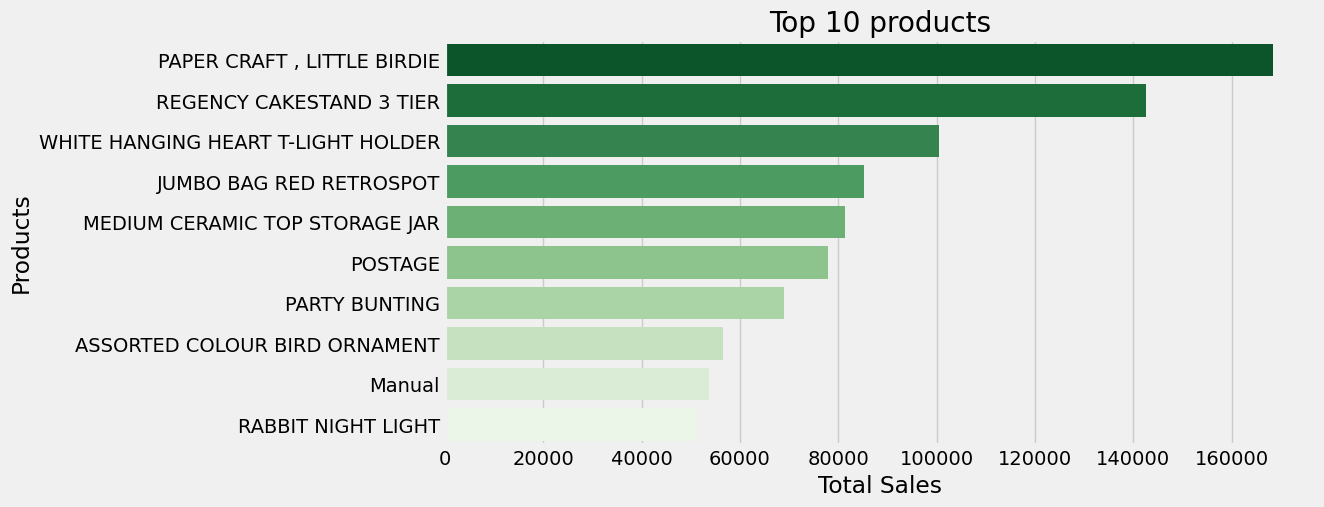

In [55]:
#Top10 products by Total Sales

top10_products = product_sales.head(10)

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data=top10_products, x=top10_products["TotalSales"],y=top10_products['Description'],
           order = top10_products["Description"], orient = "h", palette = "Greens_r")

plt.title("Top 10 products")
plt.ylabel("Products")
plt.xlabel("Total Sales")



#Top10 products by Total Sales

top10_products = product_sales.head(10)

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data=top10_products, x=top10_products["TotalSales"],y=top10_products['Description'],
           order = top10_products["Description"], orient = "h", palette = "Greens_r")

plt.title("Top 10 products")
plt.ylabel("Products")
plt.xlabel("Total Sales")

ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

plt.show()

**RFM Analysis**

In [60]:
#Recency

df['Recency'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373


**Create RFM Table**

For each customer find:

Recency : minimum Recency

Frequency: count unique number of days of purchases

Monetary: summary of Total Sales Sales

In [61]:
rfm = df.groupby(["CustomerID"]).agg({'Recency':np.min,
                                     'InvoiceDate': pd.Series.nunique,
                                     'TotalSales': np.sum}).reset_index()

rfm.rename(columns={'Recency':'Recency','InvoiceDate':'Frequency','TotalSales':'Monetary'},inplace=True)

rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40
...,...,...,...,...
4333,18280,277,1,180.60
4334,18281,180,1,80.82
4335,18282,7,2,178.05
4336,18283,3,16,2094.88


In [62]:
# Assign scores based on the recency of a customer's last purchase. 
# The most recent purchase gets a score of 4, while the oldest gets a score of 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Assign scores based on the total number of purchases. 
# The least frequent purchases receive a score of 1, and the most frequent receive a score of 4.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

# Assign scores based on the total spending by a customer. 
# The lowest spenders are assigned a score of 1, while the highest spenders are assigned a score of 4.
rfm["monetary_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,12346,325,1,77183.60,1,1,4
1,12347,1,7,4310.00,4,4,4
2,12348,74,4,1797.24,2,3,4
3,12349,18,1,1757.55,3,1,4
4,12350,309,1,334.40,1,1,2


In [63]:
rfm["CustomerID"].nunique()

4338

In [64]:
rfm["RFM_Segment"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,1,7,4310.00,4,4,4,444,12
2,12348,74,4,1797.24,2,3,4,234,9
3,12349,18,1,1757.55,3,1,4,314,8
4,12350,309,1,334.40,1,1,2,112,4


In [65]:
# Use regex patterns and dictionary values to classify customers based on their RFM scores.

# Define a dictionary to map RFM patterns to segment labels.
segt_map = {
    r'[3-4][3-4]4': 'VIP',  # High frequency, recent purchases, high monetary value
    r'[2-3-4][1-2-3-4]4': 'Top Recent',  # Moderate to high frequency, recent purchases
    r'1[1-2-3-4]4': 'Top at Risk',  # Low frequency, recent purchases, high monetary value

    r'[3-4][3-4]3': 'High Promising',  # High frequency, recent purchases, moderate monetary value
    r'[2-3-4][1-2]3': 'High New',  # Moderate frequency, new customers
    r'2[3-4]3': 'High Loyal',  # Moderate frequency, loyal customers

    r'[3-4][3-4]2': 'Medium Potential',  # High frequency, older purchases, moderate monetary value
    r'[2-3-4][1-2]2': 'Medium New',  # Moderate frequency, new customers
    r'2[3-4]2': 'Medium Loyal',  # Moderate frequency, loyal customers

    r'4[1-2-3-4]1': 'Low New',  # Low frequency, new customers
    r'[2-3][1-2-3-4]1': 'Low Loyal',  # Moderate frequency, older purchases
    r'1[1-2-3-4][1-2-3]': 'Need Activation'  # Low frequency, low monetary value, older purchases
}

# Map the RFM_Segment column to segment labels based on the dictionary and regex patterns.
rfm['Segment_labels'] = rfm['RFM_Segment'].replace(segt_map, regex=True)

# Display the first few rows of the updated DataFrame.
rfm.head()



,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,12346,325,1,77183.60,1,1,4,114,6,Top at Risk
1,12347,1,7,4310.00,4,4,4,444,12,VIP
2,12348,74,4,1797.24,2,3,4,234,9,Top Recent
3,12349,18,1,1757.55,3,1,4,314,8,Top Recent
4,12350,309,1,334.40,1,1,2,112,4,Need Activation


**Calculate Customers per Segments and all Stats per Segment**

In [66]:
# segements_grouped = rfm[["Segment_labels", "Recency","Frequency","Monetary"]].\
# groupby("Segment_labels").agg(["mean","count","max"]).round().reset_index()


segements_grouped = rfm.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                                   "CustomerID": pd.Series.nunique,
                                    "Recency": np.mean,                     
                                     "Frequency": np.mean,
                                                        }).reset_index()

segements_grouped["Monetary%"] = segements_grouped["Monetary"]/segements_grouped["Monetary"].sum()*100
segements_grouped["Count%"] = segements_grouped["CustomerID"]/segements_grouped["CustomerID"].sum()*100

segements_grouped.rename(columns={'Monetary':'TotalMonetary','CustomerID':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)


segements_grouped = segements_grouped.sort_values(by=['Monetary%'], ascending=False)
segements_grouped


,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%
11,VIP,5956527.400,830,14.580723,12.093976,66.841597,19.133241
9,Top Recent,792983.440,205,72.902439,4.814634,8.898520,4.725680
2,High Promising,549163.581,488,18.670082,4.586066,6.162478,11.249424
8,Need Activation,405183.300,1034,247.417795,1.500967,4.546793,23.835869
10,Top at Risk,302034.811,50,216.260000,4.200000,3.389305,1.152605
1,High New,233621.920,243,53.440329,1.679012,2.621605,5.601660
0,High Loyal,223176.190,201,84.179104,3.895522,2.504388,4.633472
6,Medium New,213847.961,468,51.382479,1.433761,2.399710,10.788382
7,Medium Potential,87427.800,168,21.398810,3.107143,0.981077,3.872752
3,Low Loyal,83207.420,454,61.374449,1.266520,0.933718,10.465652


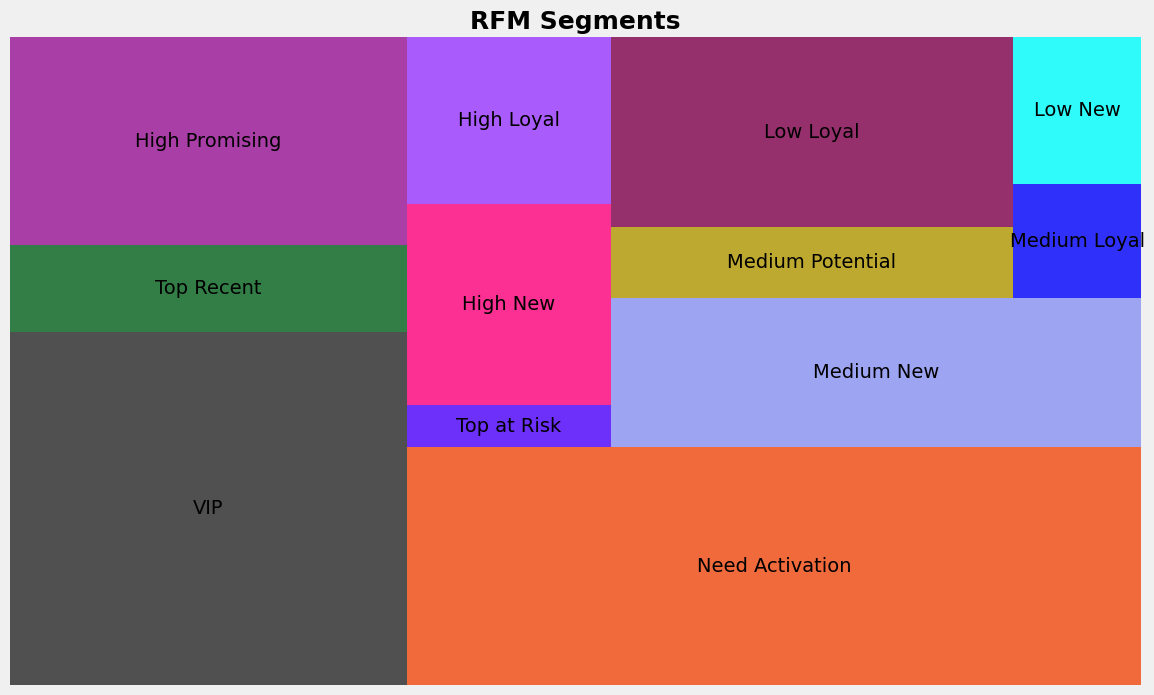

In [67]:
# Plot Segments in a Treemap


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
# use squarify to plot treemap
sq.plot(sizes=segements_grouped["Customers%"], 
                      label=['VIP', 
                            "Top Recent", 
                            'High Promising', 
                            'Need Activation', 
                            'Top at Risk', 
                            'High New', 
                            'High Loyal',
                            'Medium New',
                            'Medium Potential',
                            'Low Loyal',
                            'Medium Loyal',
                            'Low New'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

**Pareto Analysis - Customers Segmentation**

Here, we aim to analyze the percentage of customers contributing to the total percentage of sales. 
This will help us identify our most valuable customers.

In [68]:
segements_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%
11,VIP,5956527.400,830,14.580723,12.093976,66.841597,19.133241
9,Top Recent,792983.440,205,72.902439,4.814634,8.898520,4.725680
2,High Promising,549163.581,488,18.670082,4.586066,6.162478,11.249424
8,Need Activation,405183.300,1034,247.417795,1.500967,4.546793,23.835869
10,Top at Risk,302034.811,50,216.260000,4.200000,3.389305,1.152605
1,High New,233621.920,243,53.440329,1.679012,2.621605,5.601660
0,High Loyal,223176.190,201,84.179104,3.895522,2.504388,4.633472
6,Medium New,213847.961,468,51.382479,1.433761,2.399710,10.788382
7,Medium Potential,87427.800,168,21.398810,3.107143,0.981077,3.872752
3,Low Loyal,83207.420,454,61.374449,1.266520,0.933718,10.465652


If we analyze our results, we notice that VIP and Top Recent Customers (23% of the total customers) generate 74% of the Monetary Value (Sales). This clearly demonstrates that the Pareto Principle applies in this case. However, we will also validate this using the traditional approach by creating a plot to confirm it.

We can first apply the graph to our predefined segments and then extend it to individual customers.

In [70]:
segments_pareto = segements_grouped[["Segment_labels","TotalMonetary"]]
segments_pareto["CumulativePercentage"] = (segments_pareto["TotalMonetary"].cumsum()/ 
                                      segments_pareto["TotalMonetary"].sum()*100).round(2)

In [71]:
segments_pareto

,Segment_labels,TotalMonetary,CumulativePercentage
11,VIP,5956527.400,66.84
9,Top Recent,792983.440,75.74
2,High Promising,549163.581,81.90
8,Need Activation,405183.300,86.45
10,Top at Risk,302034.811,89.84
1,High New,233621.920,92.46
0,High Loyal,223176.190,94.96
6,Medium New,213847.961,97.36
7,Medium Potential,87427.800,98.35
3,Low Loyal,83207.420,99.28


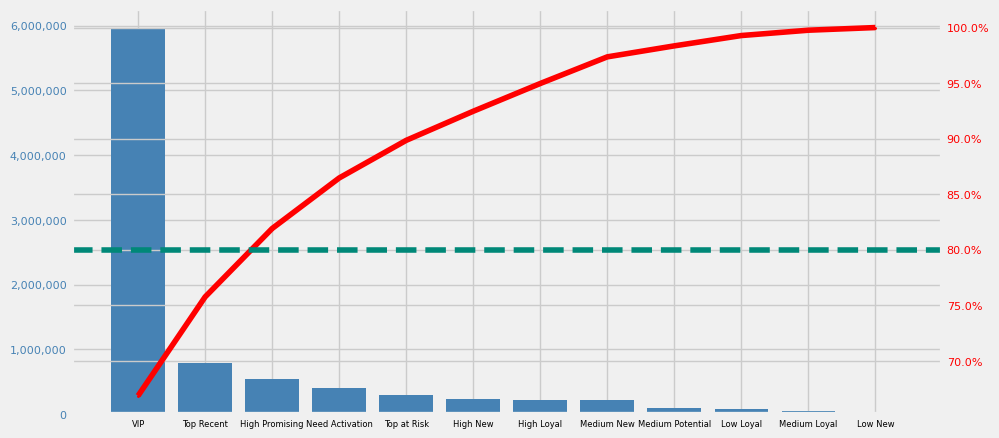

In [72]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(segments_pareto['Segment_labels'], segments_pareto['TotalMonetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(segments_pareto['Segment_labels'], segments_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

In [73]:
df_grouped = df.groupby("CustomerID").\
    agg({"TotalSales": np.sum
        })

df_grouped = df_grouped.sort_values("TotalSales", ascending = False).reset_index()
df_grouped

,CustomerID,TotalSales
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
...,...,...
4333,16878,13.30
4334,17956,12.75
4335,16454,6.90
4336,14792,6.20


In [74]:
df_grouped["CumulativePercentage"] = (df_grouped["TotalSales"].cumsum()/ 
                                      df_grouped["TotalSales"].sum()*100).round(2)
                                      

df_grouped

,CustomerID,TotalSales,CumulativePercentage
0,14646,280206.02,3.14
1,18102,259657.30,6.06
2,17450,194550.79,8.24
3,16446,168472.50,10.13
4,14911,143825.06,11.75
...,...,...,...
4333,16878,13.30,100.00
4334,17956,12.75,100.00
4335,16454,6.90,100.00
4336,14792,6.20,100.00


In [75]:
# Narrowing our focus to the range between 79.9% and 80.1% of total sales to identify the specific number of customers responsible for this contribution.

df_grouped[(df_grouped["CumulativePercentage"]>79.9) & (df_grouped["CumulativePercentage"]<80.1)]


,CustomerID,TotalSales,CumulativePercentage
1127,15660,1600.86,79.92
1128,16496,1599.52,79.93
1129,13850,1595.48,79.95
1130,17837,1593.38,79.97
1131,16332,1593.20,79.99
1132,16676,1592.12,80.01
1133,14970,1592.06,80.02
1134,15611,1591.45,80.04
1135,18178,1590.81,80.06
1136,14442,1589.82,80.08


As we observe the highest 1131-1132 customers produce 80% of total sales. 

In [76]:
1132/len(df_grouped)

0.26094974642692487

So we see that they represent 26% of total customers.

In this way we just found out that the highest 26% of customers produce 80% of total Sales.

So the Pareto Principle is applied almost perfectly in our example. Now let's work in order to porduce also the according plot which will also visualize it.

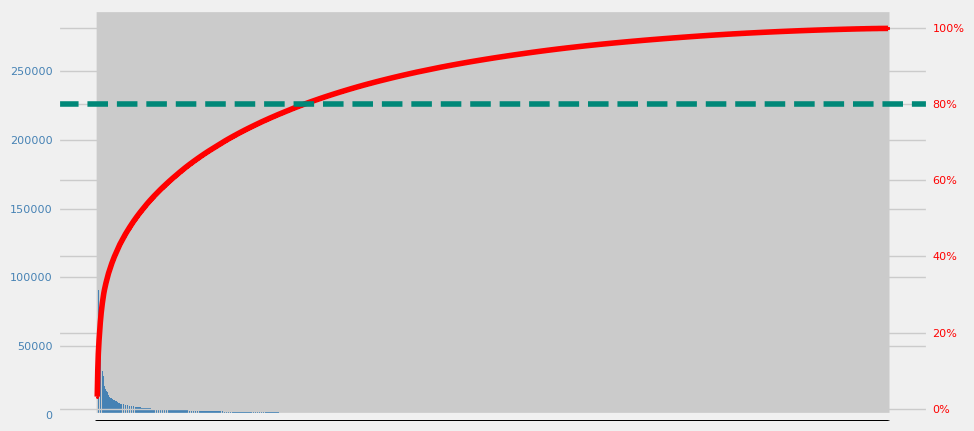

In [77]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_grouped['CustomerID'], df_grouped['TotalSales'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_grouped['CustomerID'], df_grouped['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])

ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 1)

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()